### Dilution Problem in Python

A tank initially holds 100 gal of a brine solution containing 1 Ib of salt. At t = 0 another brine solution
containing 1 Ib of salt per gallon is poured into the tank at the rate of 3 gal/min, while the well-stirred
mixture leaves the tank at the same rate. Find (a) the amount of salt in the tank at any time t and (b) the
time at which the mixture in the tank contains 2 Ib of salt.

In [103]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [118]:
V0 = 100 # initial brine solution containing 1 lb of salt in the tank
a = 1 # amount of salt that brine solution contains initially at time = 0
b = 1 # amount of salt that another brine solution contains
e = 3 # rate at which another brine solution is poured into the tank
f = 3 # rate at which well-stirred mixture leaves the tank

In [149]:
def model(y,t):
    dydt = b*e-(f*y)/(V0+e*t-f*t)
    return dydt

# integrate the equations
t = np.linspace(0,50) # times to report solution
y = odeint(model,1,t) # integrate

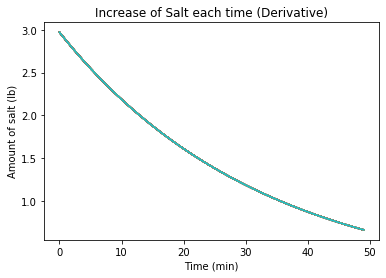

In [150]:
# plot results
plt.figure()
plt.plot(model(y,t));
plt.title('Increase of Salt each time (Derivative)')
plt.xlabel('Time (min)')
plt.ylabel('Amount of salt (lb)')
plt.show()

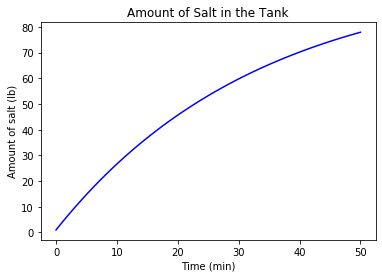

In [151]:
# plot results
plt.figure()
plt.plot(t,y,'b-')
plt.title('Amount of Salt in the Tank')
plt.xlabel('Time (min)')
plt.ylabel('Amount of salt (lb)')
plt.savefig('Amount of Salt in the Tank')
plt.show()

In [152]:
y

array([[ 1.        ],
       [ 3.98469509],
       [ 6.87940626],
       [ 9.68684642],
       [12.40964665],
       [15.05035871],
       [17.61145741],
       [20.09534302],
       [22.50434339],
       [24.84071616],
       [27.10665096],
       [29.30427138],
       [31.43563695],
       [33.5027452 ],
       [35.50753336],
       [37.4518803 ],
       [39.33760822],
       [41.1664844 ],
       [42.94022282],
       [44.6604858 ],
       [46.32888555],
       [47.94698566],
       [49.51630259],
       [51.03830711],
       [52.51442557],
       [53.94604132],
       [55.33449608],
       [56.68109109],
       [57.98708837],
       [59.25371189],
       [60.48214868],
       [61.67355   ],
       [62.82903247],
       [63.94967897],
       [65.03653972],
       [66.09063332],
       [67.11294765],
       [68.10444081],
       [69.06604199],
       [69.99865241],
       [70.90314608],
       [71.78037069],
       [72.63114834],
       [73.45627639],
       [74.25652811],
       [75